# Data Preprocessing & Feature Engineering
In this notebook I will continue preparing the Ames housing data fro modeling by:
- handling outliers
- engineering new features to enhance model performance
- encoding categorical variables
- scaling numerical features for model compatibility
- splitting the data into training and testing sets

## Load Data

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

df = pd.read_csv('../data/ames_housing_cleaned.csv')

## Handling Outliers
In this step, I will focus on a set of core features identified during EDA as being strongly correlated with `SalePrice`. Additionally, I will include features necessary for constructing engineered variables.

**Core Features (Strong Correlation with SalePrice):**
- `Overall Qual`
- `Gr Liv Area`
- `Garage Cars`
- `Total Bsmt SF`
- `Year Built` (to be used for calculating `HouseAge`)

**Additional Features for Engineering:**
- `1st Flr SF` and `2nd Flr SF` (to compute `Total SF`)
- `Yr Sold` (to compute `House Age`)

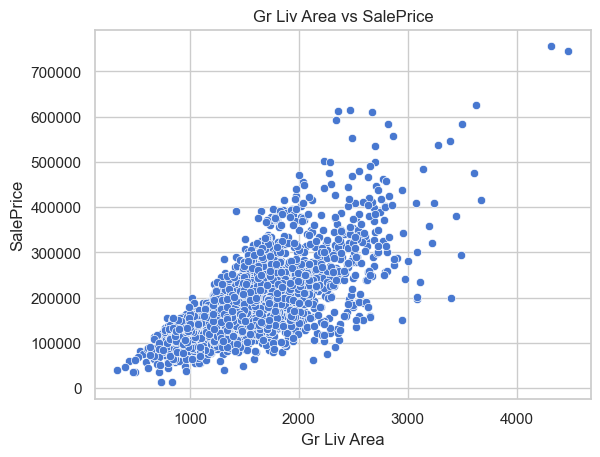

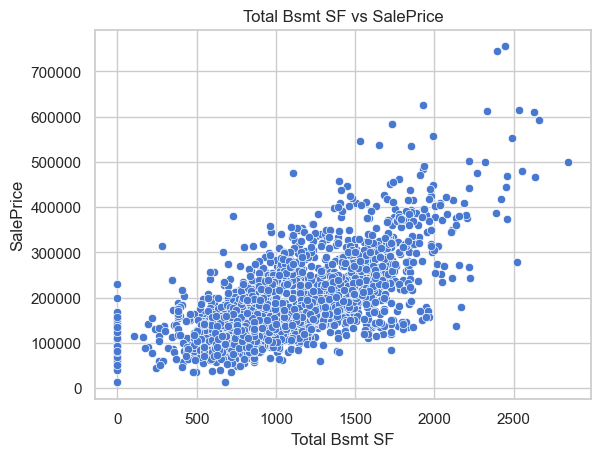

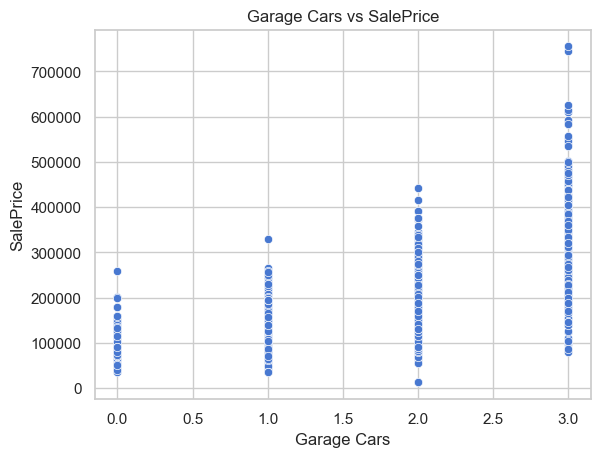

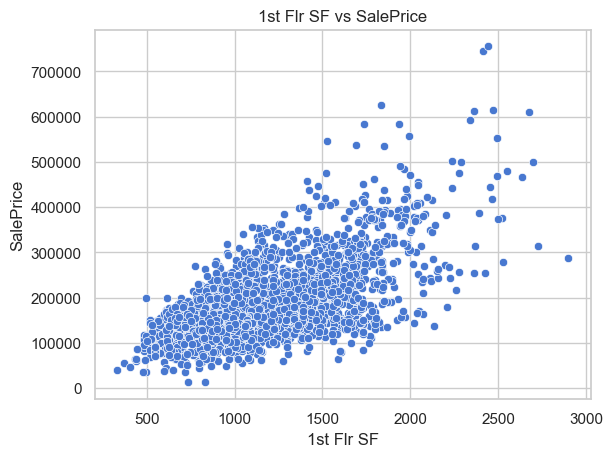

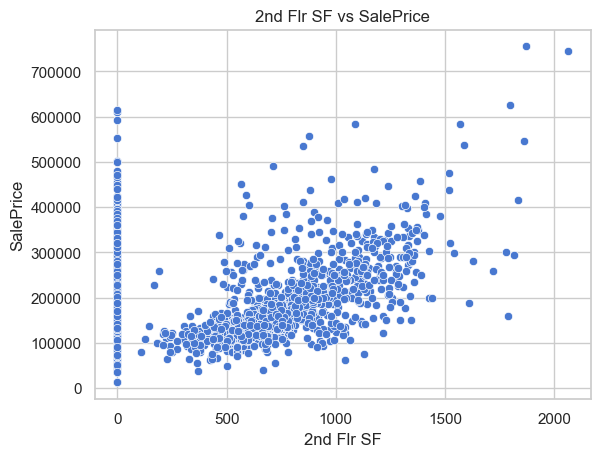

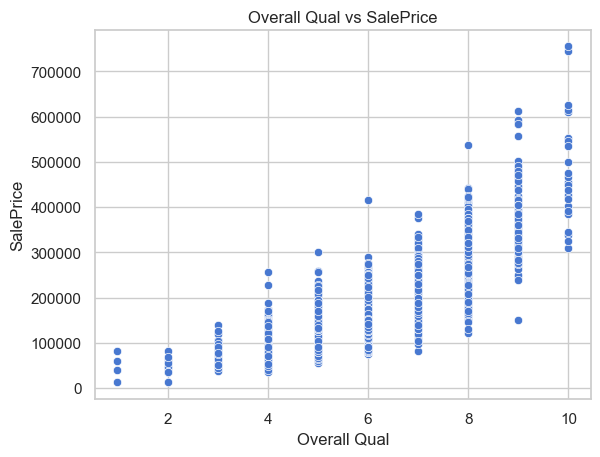

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="muted", context="notebook")

# Quick helper function to visualize outliers
def plot_feature_outliers(df, feature, target='SalePrice'):
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'{feature} vs {target}')
    plt.show()

# Features to check
outlier_features = ['Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', '1st Flr SF', '2nd Flr SF', 'Overall Qual']

# Visualize each feature against SalePrice
for feature in outlier_features:
    plot_feature_outliers(df, feature)
    
# Implementing thresholds based on norms to remove outliers
df = df[df['Gr Liv Area'] < 4500]
df = df[df['Total Bsmt SF'] < 3000]
df = df[df['Garage Cars'] <= 3]
df = df[df['1st Flr SF'] < 3000]
#2nd Flr SF and Overall Quall had no visual outliers


## Feature Engineering

## Encoding Categorical Variables

## Scaling Numerical Features

## Splitting Data